In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pyecharts import options as opts
from pyecharts.charts import Bar, Calendar, Tab

In [2]:
df=pd.read_excel("loan_data.xlsx")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

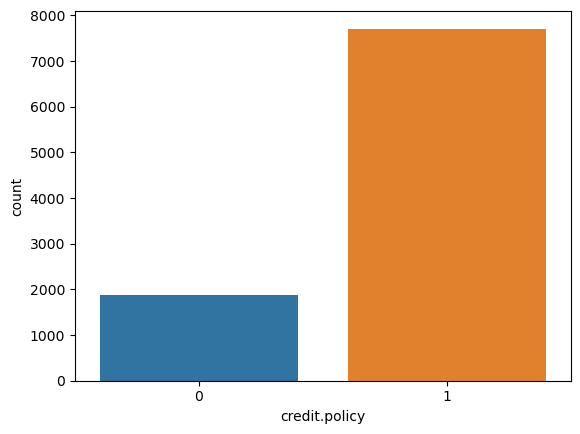

In [7]:
sns.countplot(df["credit.policy"]) #most of the customers meets the credit under writing criteria under lendco.in

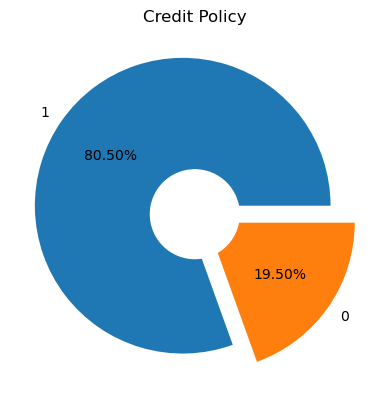

In [8]:
plt.pie(df['credit.policy'].value_counts(),autopct="%1.2f%%",labels=df["credit.policy"].unique(),explode=[0.1,0.1])
plt.title("Credit Policy")

my_circle=plt.Circle( (0,0),(0.3) , color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
#most of the customers meets the credit under writing criteria under lendco.in

<AxesSubplot:xlabel='purpose', ylabel='count'>

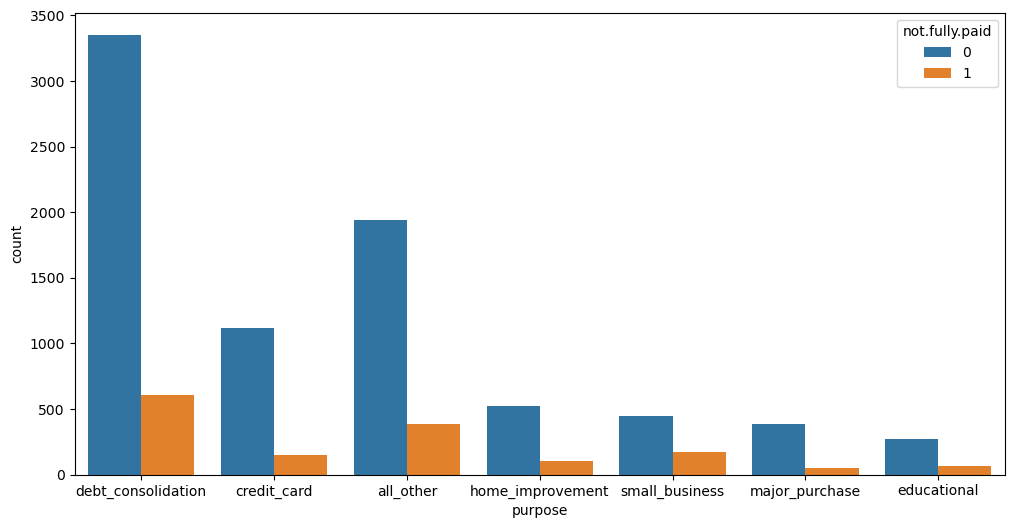

In [9]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)
#data represents that debt consolidation has the highest not fully paid than other purposes

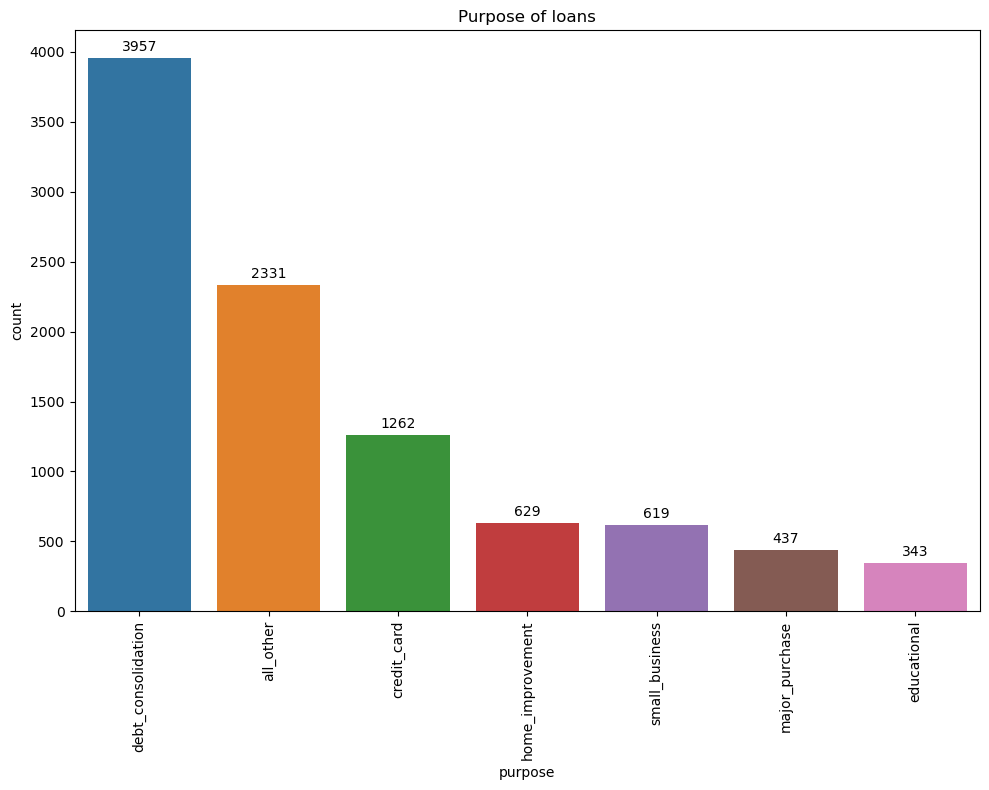

In [10]:
plt.figure(figsize=(10,8)) 
ax = sns.countplot(x="purpose",data=df,order=df["purpose"].value_counts().index)
plt.title("Purpose of loans")
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0,8), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()         #debit_consolidation haves the highest loans

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

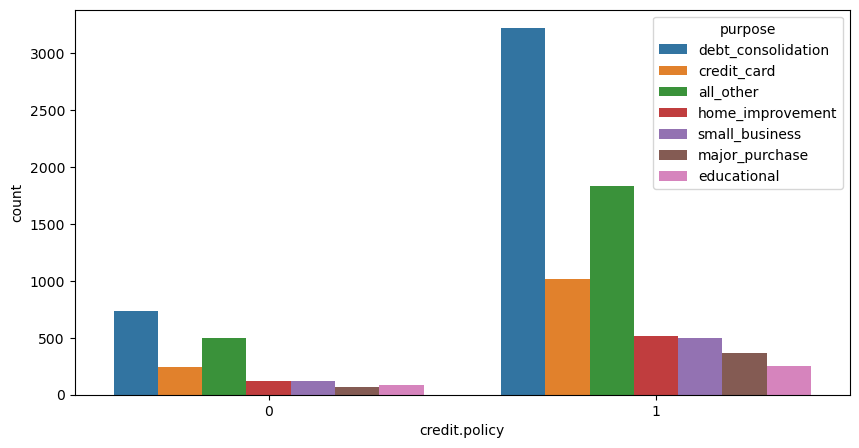

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["credit.policy"], hue=df["purpose"]) 
# most of the customers meets the credit underwriting criteria has debit_consolidation loans

<AxesSubplot:>

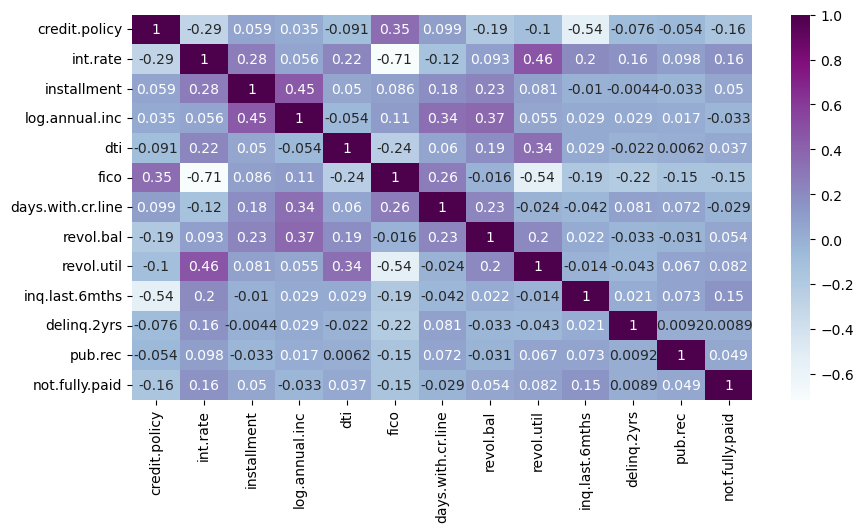

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
# The borrows revolving utilization rate has the highest installment rates
#

Text(0.5, 0, 'FICO')

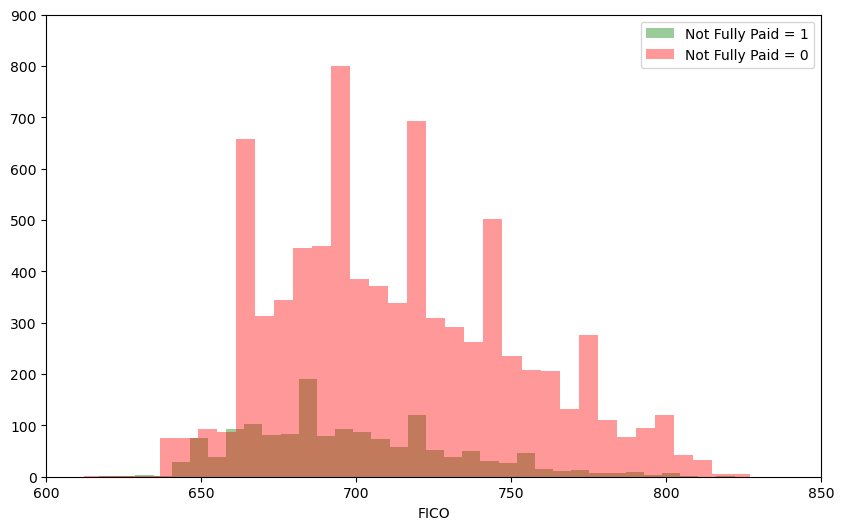

In [13]:
plt.subplots(figsize = (10,6))
sns.distplot(df[df['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'green', label = 'Not Fully Paid = 1')
sns.distplot(df[df['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Not Fully Paid = 0')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')
#Fico credit score is high for not fully paid

<AxesSubplot:xlabel='log.annual.inc', ylabel='int.rate'>

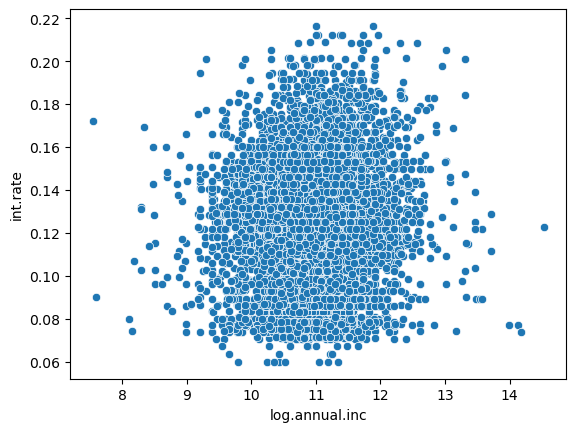

In [14]:
sns.scatterplot(x=df["log.annual.inc"],y=df["int.rate"])

<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

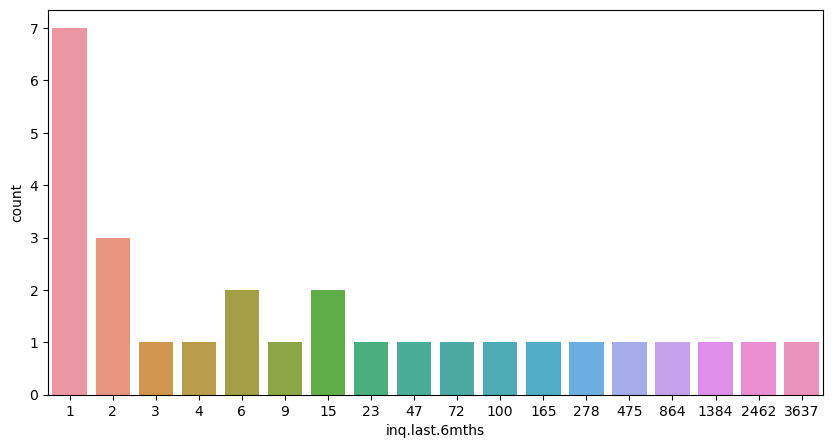

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["inq.last.6mths"].value_counts())
#inqu

In [16]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [17]:
group_by_purpose=df.groupby(by=df["purpose"]).sum().sort_values(by=["inq.last.6mths"])
group_by_purpose

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
educational,254,41.1282,74618.69,3618.634922,3891.31,242941,1.374948e+06,3714312,13308.80,636,54,15,69
major_purchase,371,49.8927,106402.47,4739.219279,4439.87,315734,1.890449e+06,3181995,14184.10,683,76,21,49
small_business,495,85.4759,268538.67,6899.507875,6681.05,445673,3.028220e+06,17072765,24803.60,1197,96,35,172
home_improvement,512,73.9116,212018.03,7046.044589,6414.23,455903,3.272055e+06,10899788,21558.74,1221,86,42,107
credit_card,1020,151.1096,403209.90,13941.604745,17793.44,895549,6.129542e+06,29253186,67643.80,1751,191,91,146
all_other,1835,272.1921,570949.41,25280.425468,25826.31,1667467,1.005059e+07,30030366,92569.42,3838,419,112,387
debt_consolidation,3223,500.9364,1420501.23,43182.381068,55700.56,2785219,1.793723e+07,67849534,214174.62,5783,646,279,603


In [18]:
bar_chart_purpose=(Bar(init_opts=opts.InitOpts(width='1500px',height='300px',theme='light',bg_color='white'))
                 .add_xaxis(group_by_purpose.index.to_list())
                 .add_yaxis("inq.last.6mths",group_by_purpose["inq.last.6mths"].round().to_list())
                .set_global_opts(opts.TitleOpts(title="Inquiries based on purpose"))
                )

bar_chart_purpose.reversal_axis()
bar_chart_purpose.render_notebook()

In [19]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [20]:
group_by_crline=df.groupby(by=df["purpose"]).sum().sort_values(by=["days.with.cr.line"])
group_by_crline

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
educational,254,41.1282,74618.69,3618.634922,3891.31,242941,1.374948e+06,3714312,13308.80,636,54,15,69
major_purchase,371,49.8927,106402.47,4739.219279,4439.87,315734,1.890449e+06,3181995,14184.10,683,76,21,49
small_business,495,85.4759,268538.67,6899.507875,6681.05,445673,3.028220e+06,17072765,24803.60,1197,96,35,172
home_improvement,512,73.9116,212018.03,7046.044589,6414.23,455903,3.272055e+06,10899788,21558.74,1221,86,42,107
credit_card,1020,151.1096,403209.90,13941.604745,17793.44,895549,6.129542e+06,29253186,67643.80,1751,191,91,146
all_other,1835,272.1921,570949.41,25280.425468,25826.31,1667467,1.005059e+07,30030366,92569.42,3838,419,112,387
debt_consolidation,3223,500.9364,1420501.23,43182.381068,55700.56,2785219,1.793723e+07,67849534,214174.62,5783,646,279,603


In [21]:
bar_chart_crline=(Bar(init_opts=opts.InitOpts(width='1500px',height='300px',theme='light',bg_color='white'))
                 .add_xaxis(group_by_crline.index.to_list())
                 .add_yaxis("days.with.cr.line",group_by_purpose["days.with.cr.line"].round().to_list())
                .set_global_opts(opts.TitleOpts(title="days.with.cr.lines based on purpose"))
                )

bar_chart_crline.reversal_axis()
bar_chart_crline.render_notebook()
# the number of days the borrowers has had a credit line is high for the debt consolidation

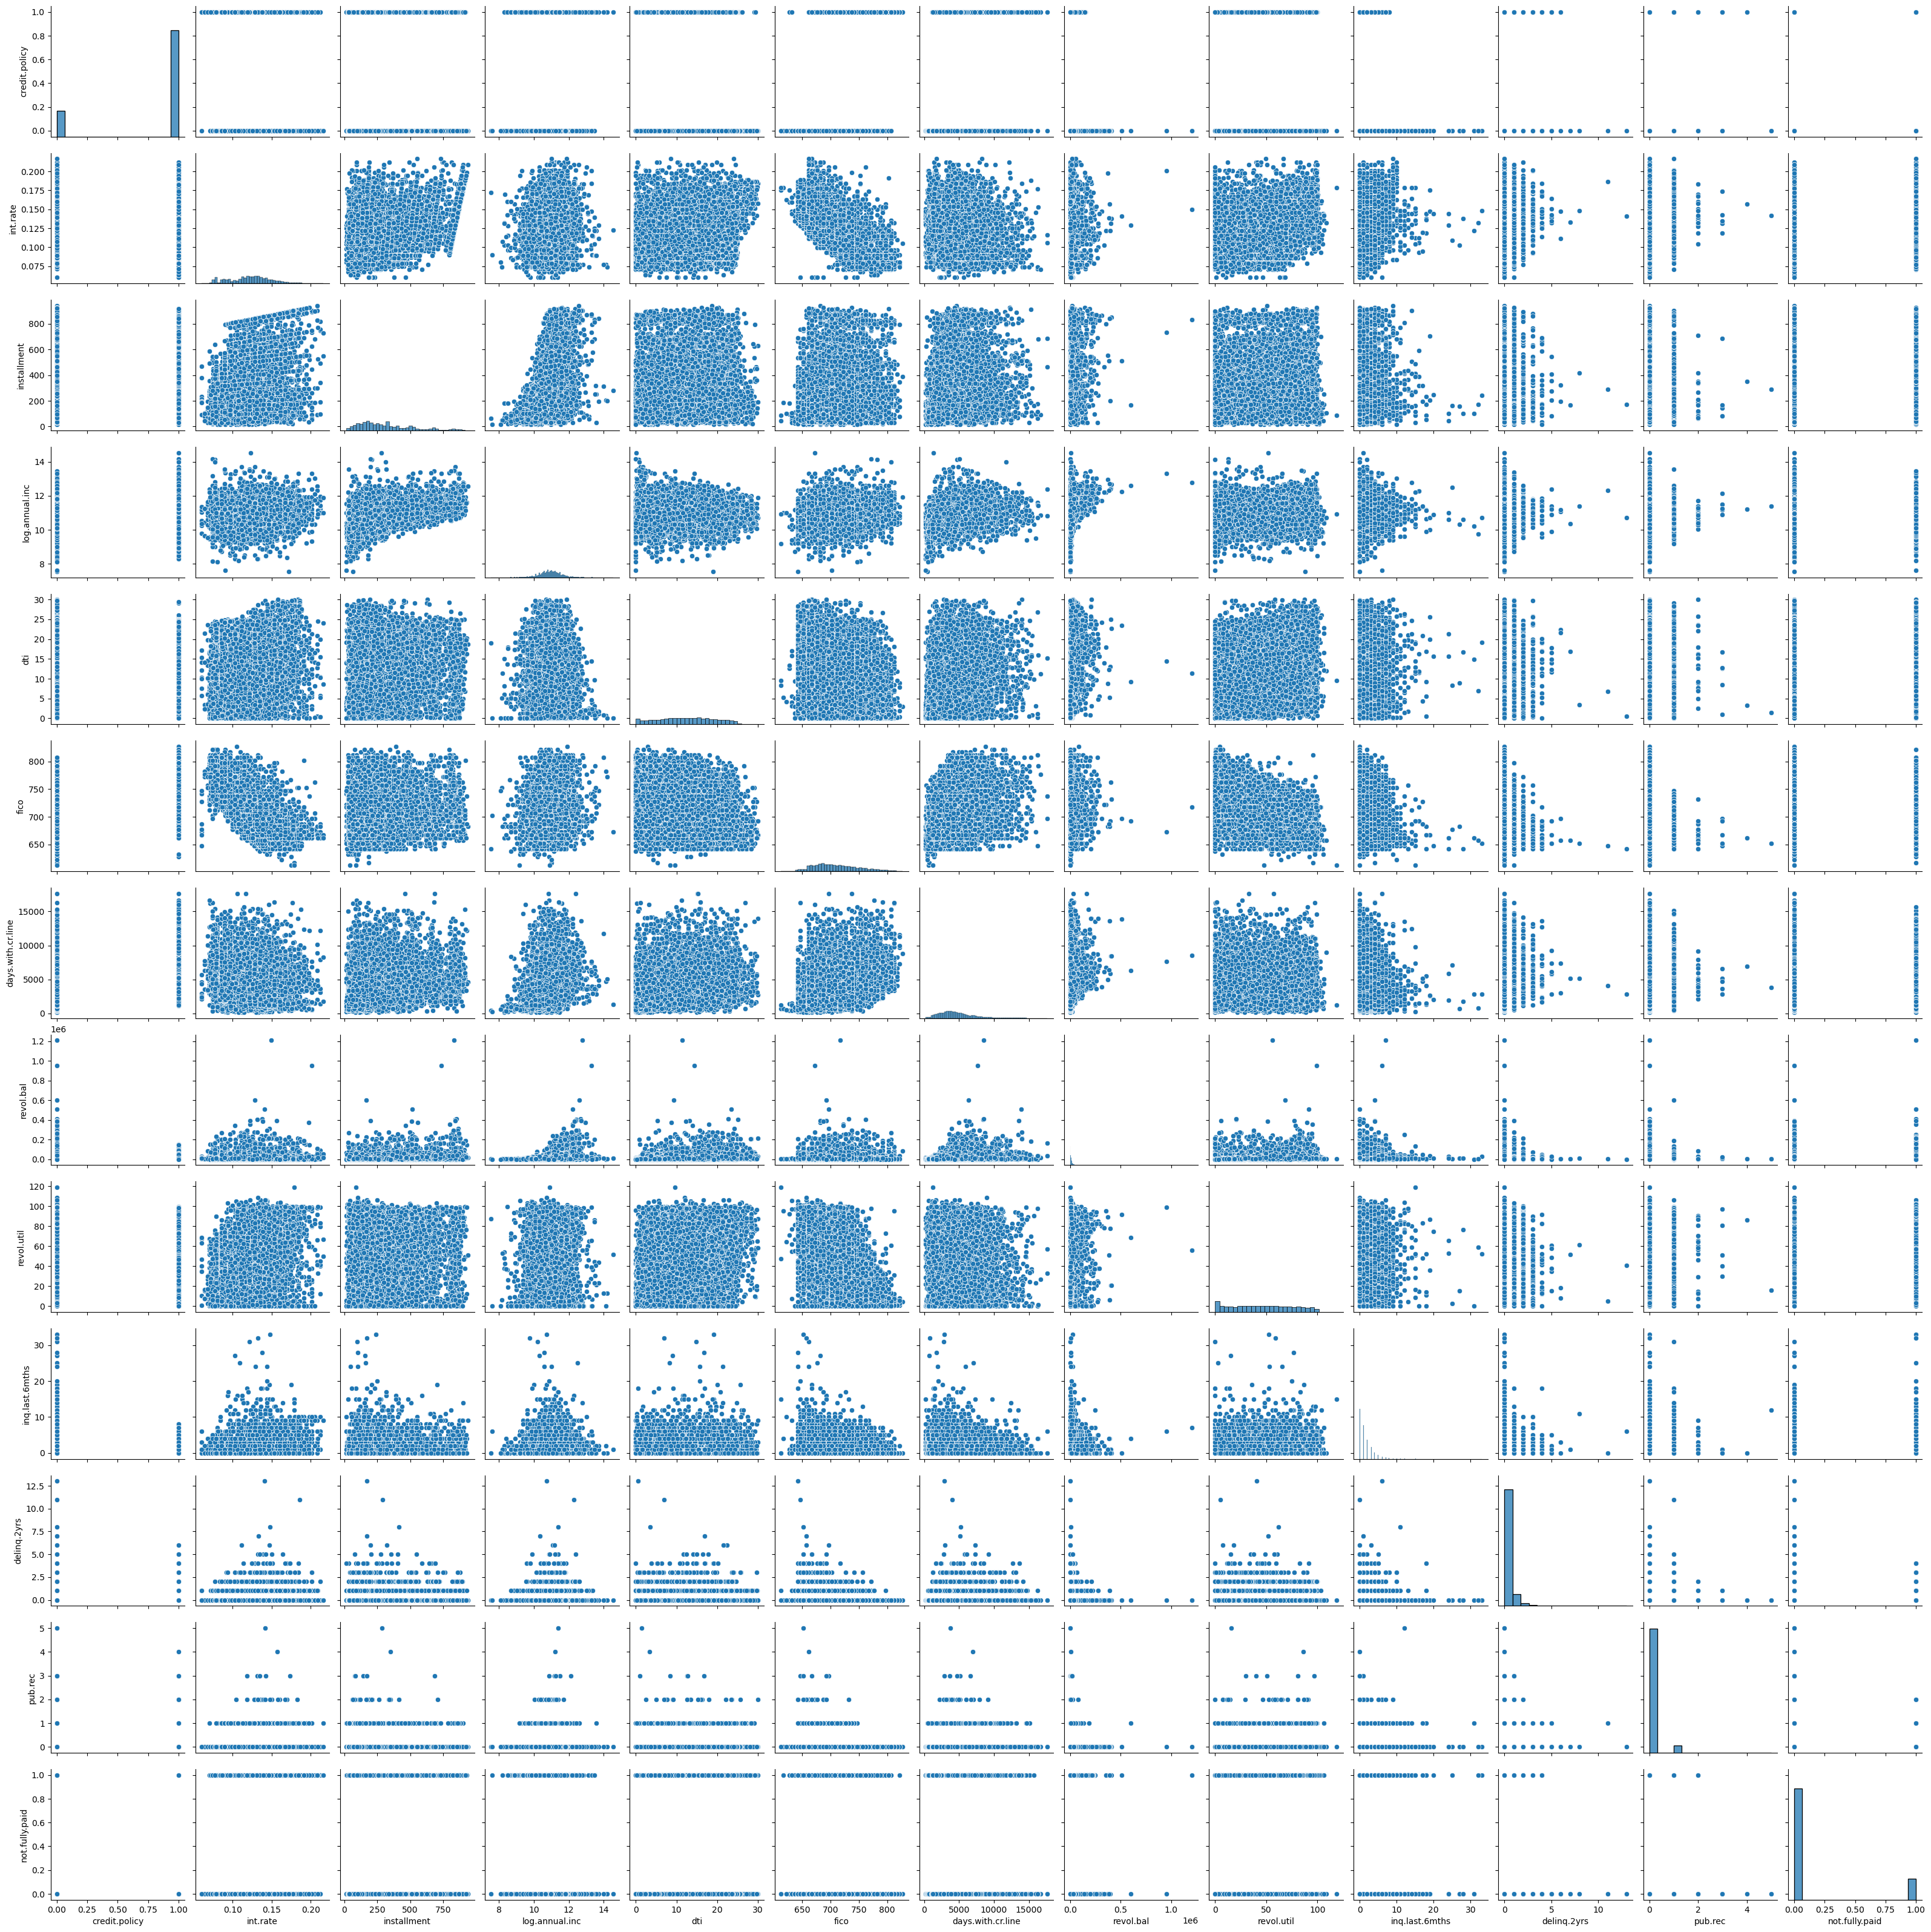

In [22]:
sns.pairplot(df)